# Lesson 3 - Tipos de Carro

Name: Beatriz Vieira Nascimento - 211031628

Github: Beatrizvn

O objetivo deste artigo é apresentar o funcionamento de diferentes modelos de redes neurais. Para fazer esta comparação usaremos um conjunto de dados de tipos de carro.


# Step 0: Baixar e importar algumas depedencias

In [ ]:
# Você pode pular esta célula se já tiver instalado
!pip install -Uqq duckduckgo_search
!pip install -Uqq fastai
!pip install -Uqq fastbook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 79.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 67.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import fastbook
from fastbook import *
from fastai.vision.widgets import *

# Step 1: Baixar imagens

In [ ]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=300): return L(ddg_images(term, max_results=max_images)).itemgot('image')

/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:40: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")


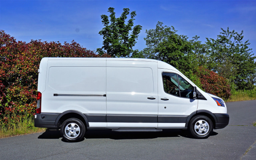

In [ ]:
from fastai.vision.all import *
from fastdownload import download_url

download_url(search_images('van', max_images=1)[0], 'van.jpg', show_progress=False)
Image.open('van.jpg').to_thumb(256,256)

In [ ]:
cars = 'van', 'suv', 'supercar'
path = Path('carsPath')

for o in cars:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o}'))
    sleep(10)
    download_images(dest, urls=search_images(f'black {o} '))
    sleep(10)
    download_images(dest, urls=search_images(f'red {o} '))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

In [ ]:
fns = get_image_files(path)
fns

In [ ]:
failed = verify_images(fns)
failed.map(Path.unlink);
failed

# Step 2:  Treinando o Modelo

Para treinar um modelo, precisaremos de `DataLoaders`, que é um objeto contendo um conjunto de treinamento (as imagens usadas para criar um modelo) e um conjunto de validação (as imagens usadas para avaliar a precisão de um modelo - não usadas durante o treinamento).

No fastai, podemos criar isso facilmente usando um `DataBlock` e visualizar imagens de amostra dele:


In [ ]:
cars = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(256))

dls = cars.dataloaders(path)

In [ ]:
dls.valid.show_batch(max_n=4, nrows=1)

## ResNet 34

Resnet34 é um modelo de classificação de imagens de última geração, estruturado como uma rede neural convolucional de 34 camadas e definido em "Deep Residual Learning for Image Recognition". Restnet34 é pré-treinado no conjunto de dados ImageNet que contém mais de 100.000 imagens em 200 classes diferentes.

No entanto, RestNet é diferente das redes neurais tradicionais no sentido de que pega resíduos de cada camada e os utiliza nas camadas conectadas subsequentes (semelhante às redes neurais residuais usadas para previsão de texto).

In [ ]:
learnResnet34 = vision_learner(dls, resnet34, metrics = error_rate)

In [ ]:
learnResnet34.fine_tune(3)

In [ ]:
matriz = ClassificationInterpretation.from_learner(learnResnet34)
matriz.plot_confusion_matrix()

## ResNet 50

ResNet-50 é uma rede neural convolucional com 50 camadas de profundidade. Você pode carregar uma versão pré-treinada da rede neural treinada em mais de um milhão de imagens do banco de dados ImageNet. A rede neural pré-treinada pode classificar imagens em 1.000 categorias de objetos, como teclado, mouse, lápis e muitos animais. Como resultado, a rede neural aprendeu representações ricas de recursos para uma ampla gama de imagens.

In [ ]:
learnResnet50 = vision_learner(dls, resnet50, metrics = error_rate)

In [ ]:
learnResnet50.fine_tune(3)

In [ ]:
matriz = ClassificationInterpretation.from_learner(learnResnet50)
matriz.plot_confusion_matrix()

## ResNet 101

ResNet-101 é uma rede neural convolucional com 101 camadas de profundidade. Você pode carregar uma versão pré-treinada da rede treinada em mais de um milhão de imagens do banco de dados ImageNet.



In [ ]:
learnResnet50 = vision_learner(dls, resnet152, metrics = error_rate)

In [ ]:
learnResnet50.fine_tune(3)

In [ ]:
matriz = ClassificationInterpretation.from_learner(learnResnet50)
matriz.plot_confusion_matrix()

## Step 3 - Análisando os diferentes modelos

Com base nesses teste é possível perceber que a rede vit_small foi a que se saiu melhor considerando o error_rate. Já entre as redes da familia resnet a 34 foi a que se saiu melhor com um erro de 0.06.

|           | Time  | Erro_rate |
|-----------|-------|-----------|
| Resnet18  | 00:41 | 0.151515  |
| Resnet34  | 01:10 | 0.060606  |
| Resnet50  | 01:36 | 0.121212  |
| vit_small | 01:58 | 0         |

As redes podem se comportar de forma diferente para cada novo problema, por isso é interessante testar diferentes redes enquanto está criando o seu modelo.

# Step 4 - Deploy

In [ ]:
learnLevit.export('model.pkl')

Acesse o modelo aqui: [hugging face](https://huggingface.co/spaces/fastaioncampus/SUV_VAN_SUPERCAR).

# Bibliographic References

[1] [Course Fastai](https://course.fast.ai/). Acesso em 5 de out de 2023.

[2] [Deep Learning for Coders with fastai & PyTorch](https://github.com/fastai/fastbook). Acesso em 5 de out de 2023.

[3] [Resnet32](https://roboflow.com/model/resnet-34). Acesso em 5 de out de 2023.

[4] [Resnet50](https://www.mathworks.com/help/deeplearning/ref/resnet50.html). Acesso em 5 de out de 2023.

[5] [Resnet101](https://www.mathworks.com/help/deeplearning/ref/resnet101.html). Acesso em 5 de out de 2023.